In [50]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft

# Определение исходных данных

In [51]:
a_0 = 1
f_0 = 35
beta = 60
#t_0 = 0.2
phi_0 = np.pi
T = 0.12
delta_t = 0.001


# фильтр низких частот (ФНЧ)

In [52]:
t0 = - 0.06
t1 = 0.06

In [53]:
t0 = - 0.06
t1 = 0.06
t_values = []
while t0 < t1:
  t_values = np.append(t_values, t0)
  t0 += 0.001
np.round(t_values, 3)


array([-0.06 , -0.059, -0.058, -0.057, -0.056, -0.055, -0.054, -0.053,
       -0.052, -0.051, -0.05 , -0.049, -0.048, -0.047, -0.046, -0.045,
       -0.044, -0.043, -0.042, -0.041, -0.04 , -0.039, -0.038, -0.037,
       -0.036, -0.035, -0.034, -0.033, -0.032, -0.031, -0.03 , -0.029,
       -0.028, -0.027, -0.026, -0.025, -0.024, -0.023, -0.022, -0.021,
       -0.02 , -0.019, -0.018, -0.017, -0.016, -0.015, -0.014, -0.013,
       -0.012, -0.011, -0.01 , -0.009, -0.008, -0.007, -0.006, -0.005,
       -0.004, -0.003, -0.002, -0.001,  0.   ,  0.001,  0.002,  0.003,
        0.004,  0.005,  0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,
        0.012,  0.013,  0.014,  0.015,  0.016,  0.017,  0.018,  0.019,
        0.02 ,  0.021,  0.022,  0.023,  0.024,  0.025,  0.026,  0.027,
        0.028,  0.029,  0.03 ,  0.031,  0.032,  0.033,  0.034,  0.035,
        0.036,  0.037,  0.038,  0.039,  0.04 ,  0.041,  0.042,  0.043,
        0.044,  0.045,  0.046,  0.047,  0.048,  0.049,  0.05 ,  0.051,
      

In [54]:
def delta_impulse(t):
  return np.inf if np.abs(t) < 0.0005  else 0

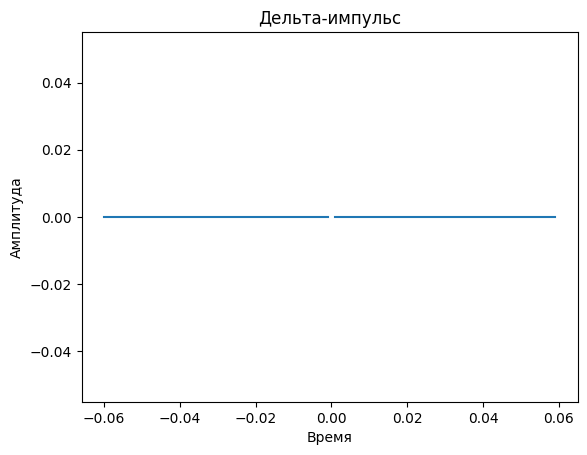

In [55]:
# Генерация времени
#t_values = np.linspace(-1, 1, num = 1000)

# Получение значений дельта-импульса для каждого момента времени
delta_values = [delta_impulse(t) for t in t_values]

# Построение графика
plt.plot(t_values, delta_values)
plt.title('Дельта-импульс')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

# Дельта-импульс

In [56]:
left_board = -0.06
right_board = 0.06
delta_t = 0.001

t_values = np.arange(left_board, right_board + delta_t, delta_t)

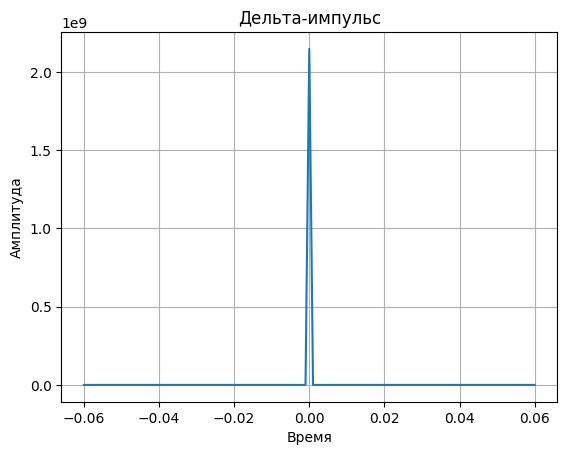

In [57]:
# Получение значений дельта-импульса для каждого момента времени
delta_values = np.zeros(len(t_values))
delta_values[len(t_values)//2] = np.iinfo(np.int32).max

# Построение графика
plt.plot(t_values, delta_values)
plt.title('Дельта-импульс')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [58]:
y = fft(delta_values)

In [59]:
# Расчет амплитудного спектра и фазочастотного спектра
amplitude_spectrum = np.abs(y)[:len(t_values)//2]
phase_spectrum = np.angle(y)[:len(t_values)//2]

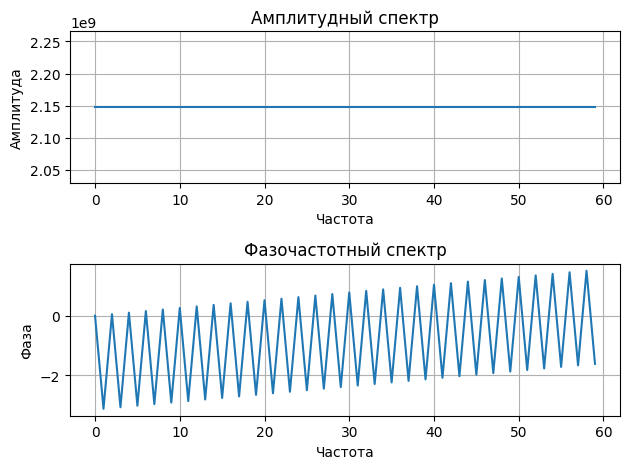

In [60]:
# Построение графика амплитудного спектра
plt.subplot(2, 1, 1)
plt.plot(amplitude_spectrum)
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

# Построение графика фазочастотного спектра
plt.subplot(2, 1, 2)
plt.plot(phase_spectrum)
plt.title('Фазочастотный спектр')
plt.xlabel('Частота')
plt.ylabel('Фаза')
plt.grid()

# Отображение графиков
plt.tight_layout()
plt.show()

# Ступенчатый импульс

In [61]:
def unit_step(t):
  return 0 if t < 0 else 1

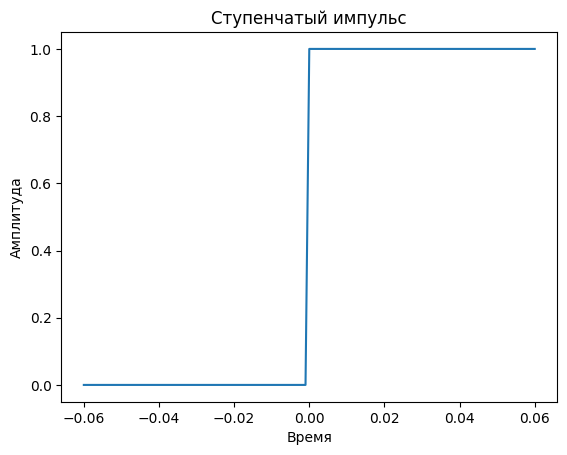

In [62]:
# Получение значений ступенчатого импульса для каждого момента времени
step_values = [unit_step(t) for t in t_values]

# Построение графика
plt.plot(t_values, step_values)
plt.title('Ступенчатый импульс')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()


In [63]:
y = fft(step_values)

In [64]:
amplitude_spectrum = np.abs(y)[:len(t_values)//2]
phase_spectrum = np.angle(y)[:len(t_values)//2]

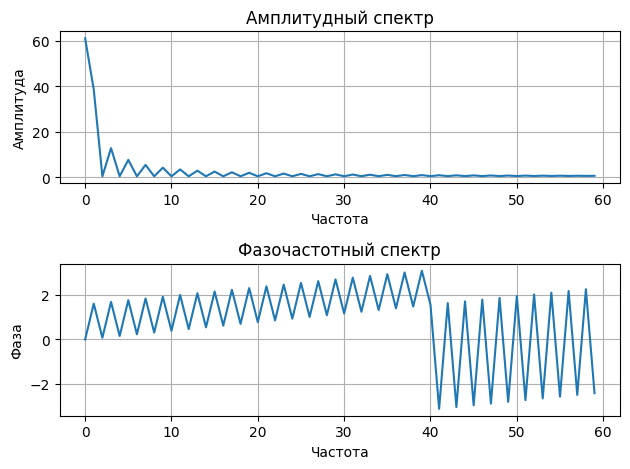

In [65]:
# Построение графика амплитудного спектра
plt.subplot(2, 1, 1)
plt.plot(amplitude_spectrum)
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

# Построение графика фазочастотного спектра
plt.subplot(2, 1, 2)
plt.plot(phase_spectrum)
plt.title('Фазочастотный спектр')
plt.xlabel('Частота')
plt.ylabel('Фаза')
plt.grid()

# Отображение графиков
plt.tight_layout()
plt.show()

# Прямоугольный импульс

In [66]:
def rectangular_pulse(t, T):
  return 1 if abs(t) <= T/50 else 0

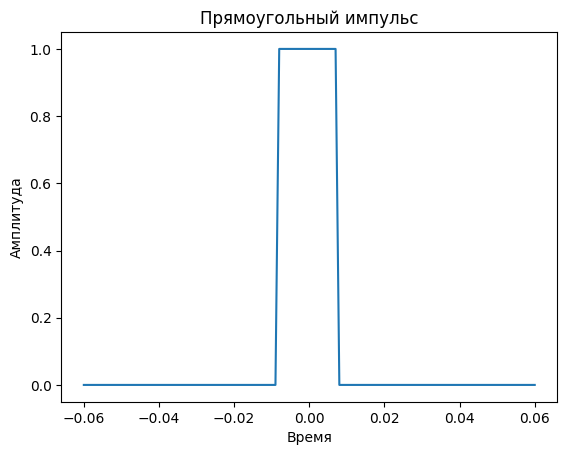

In [67]:
# Задание длительности прямоугольного импульса T
T = 0.4

# Получение значений прямоугольного импульса для каждого момента времени
rect_values = [rectangular_pulse(t, T) for t in t_values]

# Построение графика
plt.plot(t_values, rect_values)
plt.title('Прямоугольный импульс')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()


In [68]:
y = fft(rect_values)

In [69]:
amplitude_spectrum = np.abs(y)[:len(t_values)//2]
phase_spectrum = np.angle(y)[:len(t_values)//2]

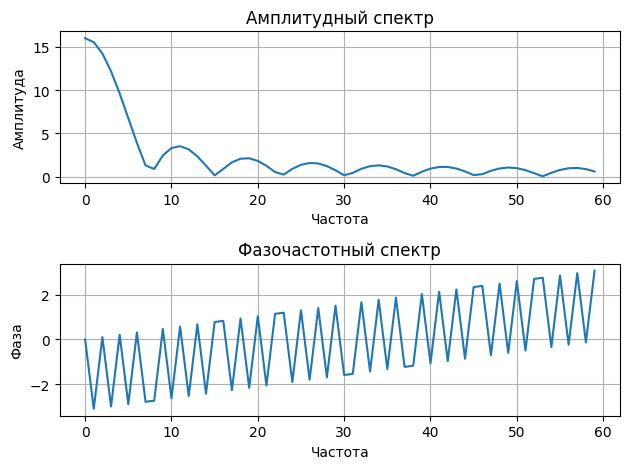

In [70]:
# Построение графика амплитудного спектра
plt.subplot(2, 1, 1)
plt.plot(amplitude_spectrum)
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

# Построение графика фазочастотного спектра
plt.subplot(2, 1, 2)
plt.plot(phase_spectrum)
plt.title('Фазочастотный спектр')
plt.xlabel('Частота')
plt.ylabel('Фаза')
plt.grid()

# Отображение графиков
plt.tight_layout()
plt.show()

# Гармонический сигнал

In [71]:
def harmonic_signal(t, A, f, phi):
  return A * np.cos(2 * np.pi * f * t + phi)

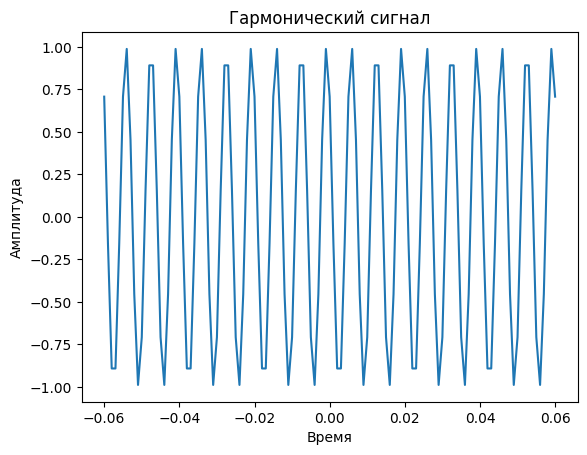

In [72]:
# Задание параметров гармонического сигнала
A = 1       # Амплитуда
f = 150       # Частота
phi = np.pi/4  # Фаза

# Получение значений гармонического сигнала для каждого момента времени
harmonic_values = [harmonic_signal(t, A, f, phi) for t in t_values]

# Построение графика
plt.plot(t_values, harmonic_values)
plt.title('Гармонический сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()


In [73]:
y = fft(harmonic_values)

In [74]:
amplitude_spectrum = np.abs(y)[:len(t_values)//2]
phase_spectrum = np.angle(y)[:len(t_values)//2]

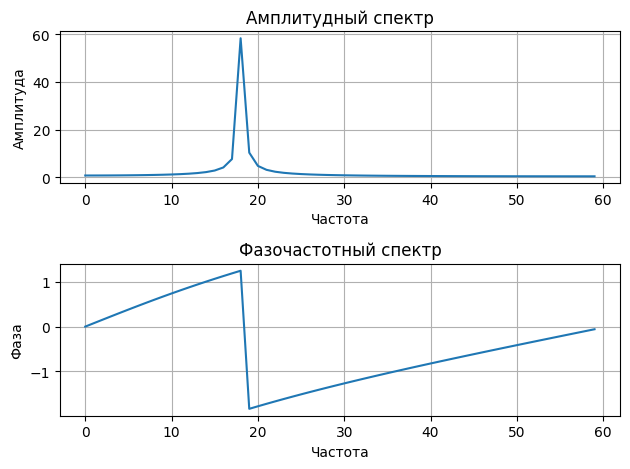

In [75]:
# Построение графика амплитудного спектра
plt.subplot(2, 1, 1)
plt.plot(amplitude_spectrum)
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

# Построение графика фазочастотного спектра
plt.subplot(2, 1, 2)
plt.plot(phase_spectrum)
plt.title('Фазочастотный спектр')
plt.xlabel('Частота')
plt.ylabel('Фаза')
plt.grid()

# Отображение графиков
plt.tight_layout()
plt.show()

# Импульс с колокольной огибающей

In [76]:
a_0 = 1
beta = 60
f_0 = 40
phi_0 = 0

In [77]:
def bell_envelope_pulse(t, a_0, beta, f_0, phi_0):
  return a_0 * np.exp(-beta**2 * t**2) * np.cos(2 * np.pi * f_0 * t + phi_0)

In [78]:
s = bell_envelope_pulse(t_values, a_0, beta, f_0, phi_0)

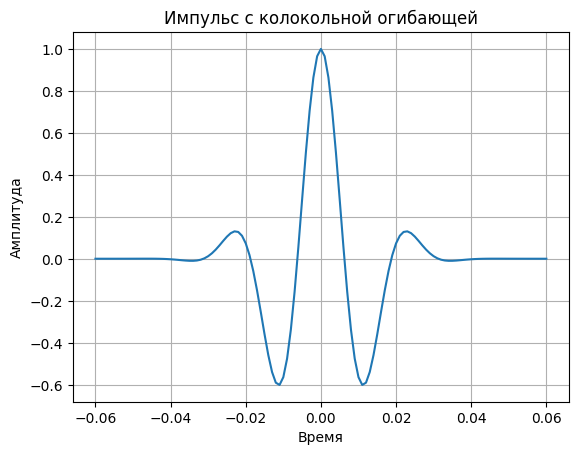

In [79]:
# Построение графика
plt.plot(t_values, s)
plt.title('Импульс с колокольной огибающей')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [80]:
y = fft(y)

In [81]:
# amplitude_spectrum = np.abs(y)
# phase_spectrum = np.angle(y)

In [82]:
# # Построение графика амплитудного спектра
# plt.subplot(2, 1, 1)
# plt.plot(amplitude_spectrum)
# plt.title('Амплитудный спектр')
# plt.xlabel('Частота')
# plt.ylabel('Амплитуда')
# plt.grid()

# # Построение графика фазочастотного спектра
# plt.subplot(2, 1, 2)
# plt.plot(phase_spectrum)
# plt.title('Фазочастотный спектр')
# plt.xlabel('Частота')
# plt.ylabel('Фаза')
# plt.grid()

# # Отображение графиков
# plt.tight_layout()
# plt.show()

In [87]:
A = np.zeros(3*len(s)-1)
B = np.zeros(3*len(s)-1)

In [88]:
for k in range(len(A)):
  for i in range(len(s)-1):
    A[k] += s[i]*np.cos(2*np.pi*k*i/(len(s)))
    B[k] += s[i]*np.sin(2*np.pi*k*i/(len(s)))

In [89]:
AFC = np.zeros(len(A))
for k in range(len(A)):
  AFC[k] = (A[k]**2 + B[k]**2)**(1/2)

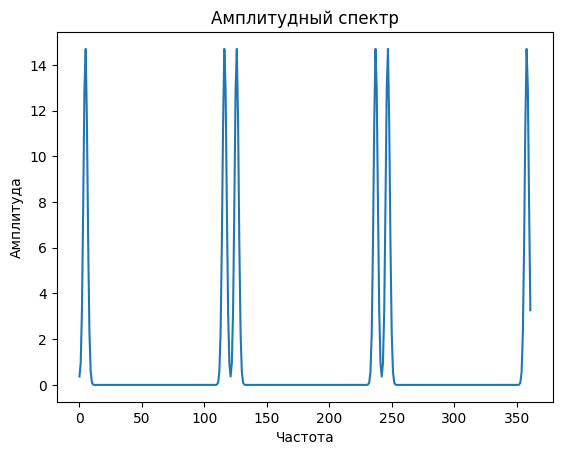

In [91]:
# Построение графика амплитудного спектра

plt.plot(AFC)
plt.title('Амплитудный спектр')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()